## Healthcare Cost Prediction with Linear Regression

## DeAundrie Howard

### <font size= "4" > Description of the Data </font>


<h3> age: </h3> age of primary beneficiary

<h3>sex:</h3> insurance contractor gender, 0 = female, 1 = male

<h3>bmi:</h3> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

<h3>children:</h3> Number of children covered by health insurance / Number of dependents

<h3>smoker:</h3> Smoking 0 = No 1 = Yes

<h3>region:</h3> the beneficiary's residential area in the US, northeast = 1, southeast = 2, southwest =3, northwest = 4.

<h3>charges:</h3> Individual medical costs billed by health insurance:  <span style = 'color: red'>Charges will be the target (dependent) variable. </span>

Dataset Retrieved from:  https://www.kaggle.com/mirichoi0218/insurance

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

### <span style = 'color: red'>Question 1:  </span>   What libraries are being used (above), and what is the main function of the libraries listed?  Add a code block below to answer the question.  Ensure the new code block is run as markdown and not code.

The libraries being used are the following: pandas, numpy, scikit-learn, seaborn, and matplotlib. Their respectives functions are as follows: numpy - data manipulatiion, panda - data mnanipulation, analysis, and cleaning, scikit-learn - building and deploying machine learning models, seaborn - data visualization, and matplotlib - data visualization. 

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import Libraries

### Load Data

In [3]:
insurancedata = ('insurance.csv')

In [4]:
df= pd.read_csv (insurancedata)

### <span style = 'color: red'>Question 2:  </span>   What comment would you add to the above code block to describe what was happening with the code?  Add a code block below to answer question. Be sure that the new code block is run as markdown and not code.

I would insert: 
    Code Block #3: #import insurance data and assign to variable
    Code Block #4: #Create DataFrame with newly imported insurance data

###  Look at the dataframe

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


###  Preprocess the Dataset

### <span style = 'color: red'>Question 3:  </span>  What command would need to be entered in order to preprocess the dataset?  Add a code block below to answer the question. Ensure the new code block is run as code and not markdown. /n

## <span style = 'color: red'> (Hint: For this and other questions on  the final, refer to your homework.) </span> 

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Performing the EDA

In [8]:
# Get the number of records/rows, and the number of variables/columns 

print(df.shape)

(1338, 7)


### <span style = 'color: red'>Question 4:  </span>  What command would you use to get the data types of all the variables?  Add a code block below to answer question. Be sure that the new code block is run as code and not markdown.

In [10]:
print(df.dtypes)

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


In [11]:
# Obtain the summary statistics of the data

print(df.describe())

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      2.486547  13270.422265  
std       1.104915  12110.011237  
min       1.000000   1121.873900  
25%       2.000000   4740.287150  
50%       2.000000   9382.033000  
75%       3.000000  16639.912515  
max       4.000000  63770.428010  


### <span style = 'color: red'>Question 5:  </span>  What information can you get from the output of the code output above?  Add a code block below to answer question. Be sure that the new code block is run as markdown and not code.

The output above proves a statistical summary of each category.

### Creating a Historgram

### <span style = 'color: red'>Question 6:  </span>  What code would you use to create a histogram?  Add a code block below to answer question. Be sure that the new code block is run as <span style = 'color: red'>code and not markdown.</span> 

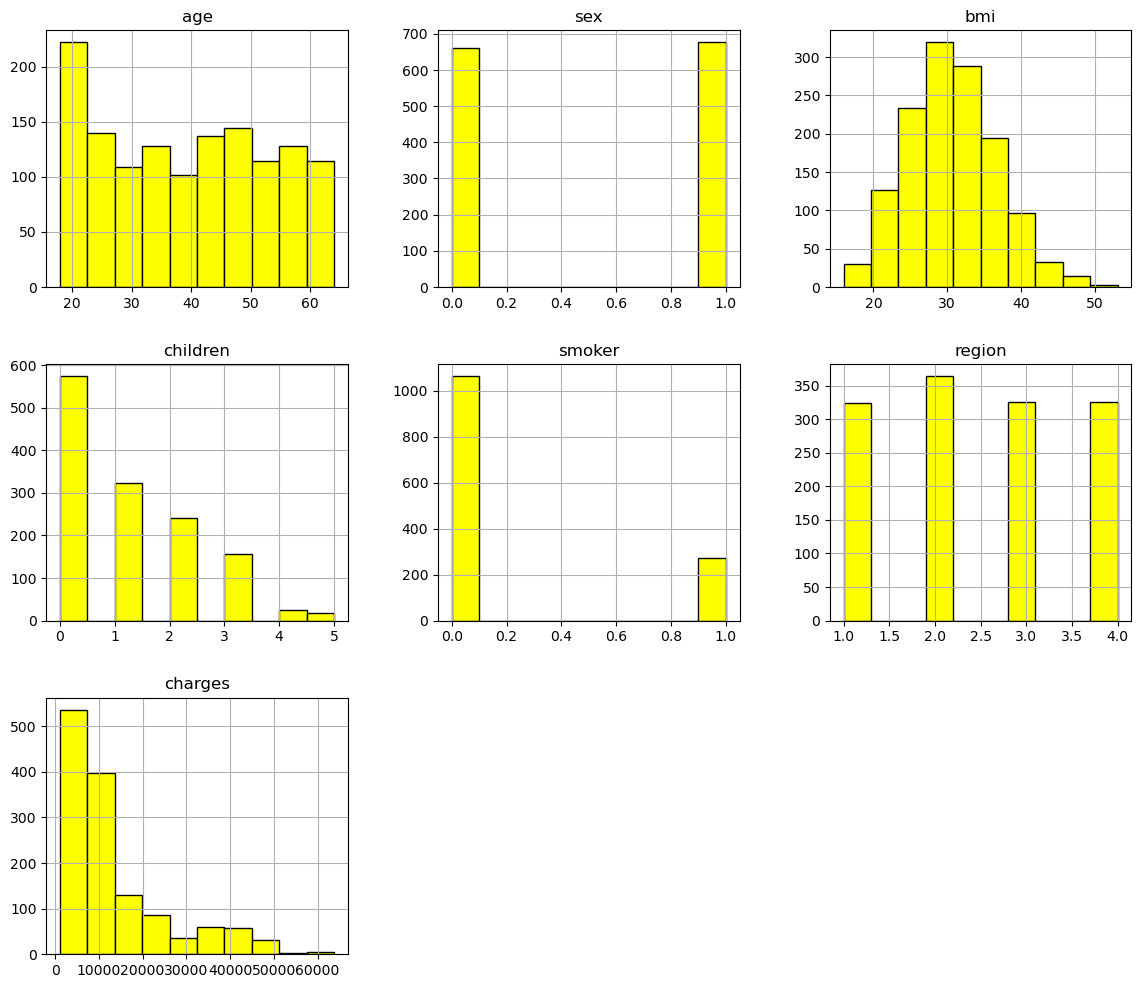

In [15]:
df.hist(color = 'yellow', edgecolor= 'black',figsize=(14,12), bins= 10)
plt.show()

###  Creating a Box Plot

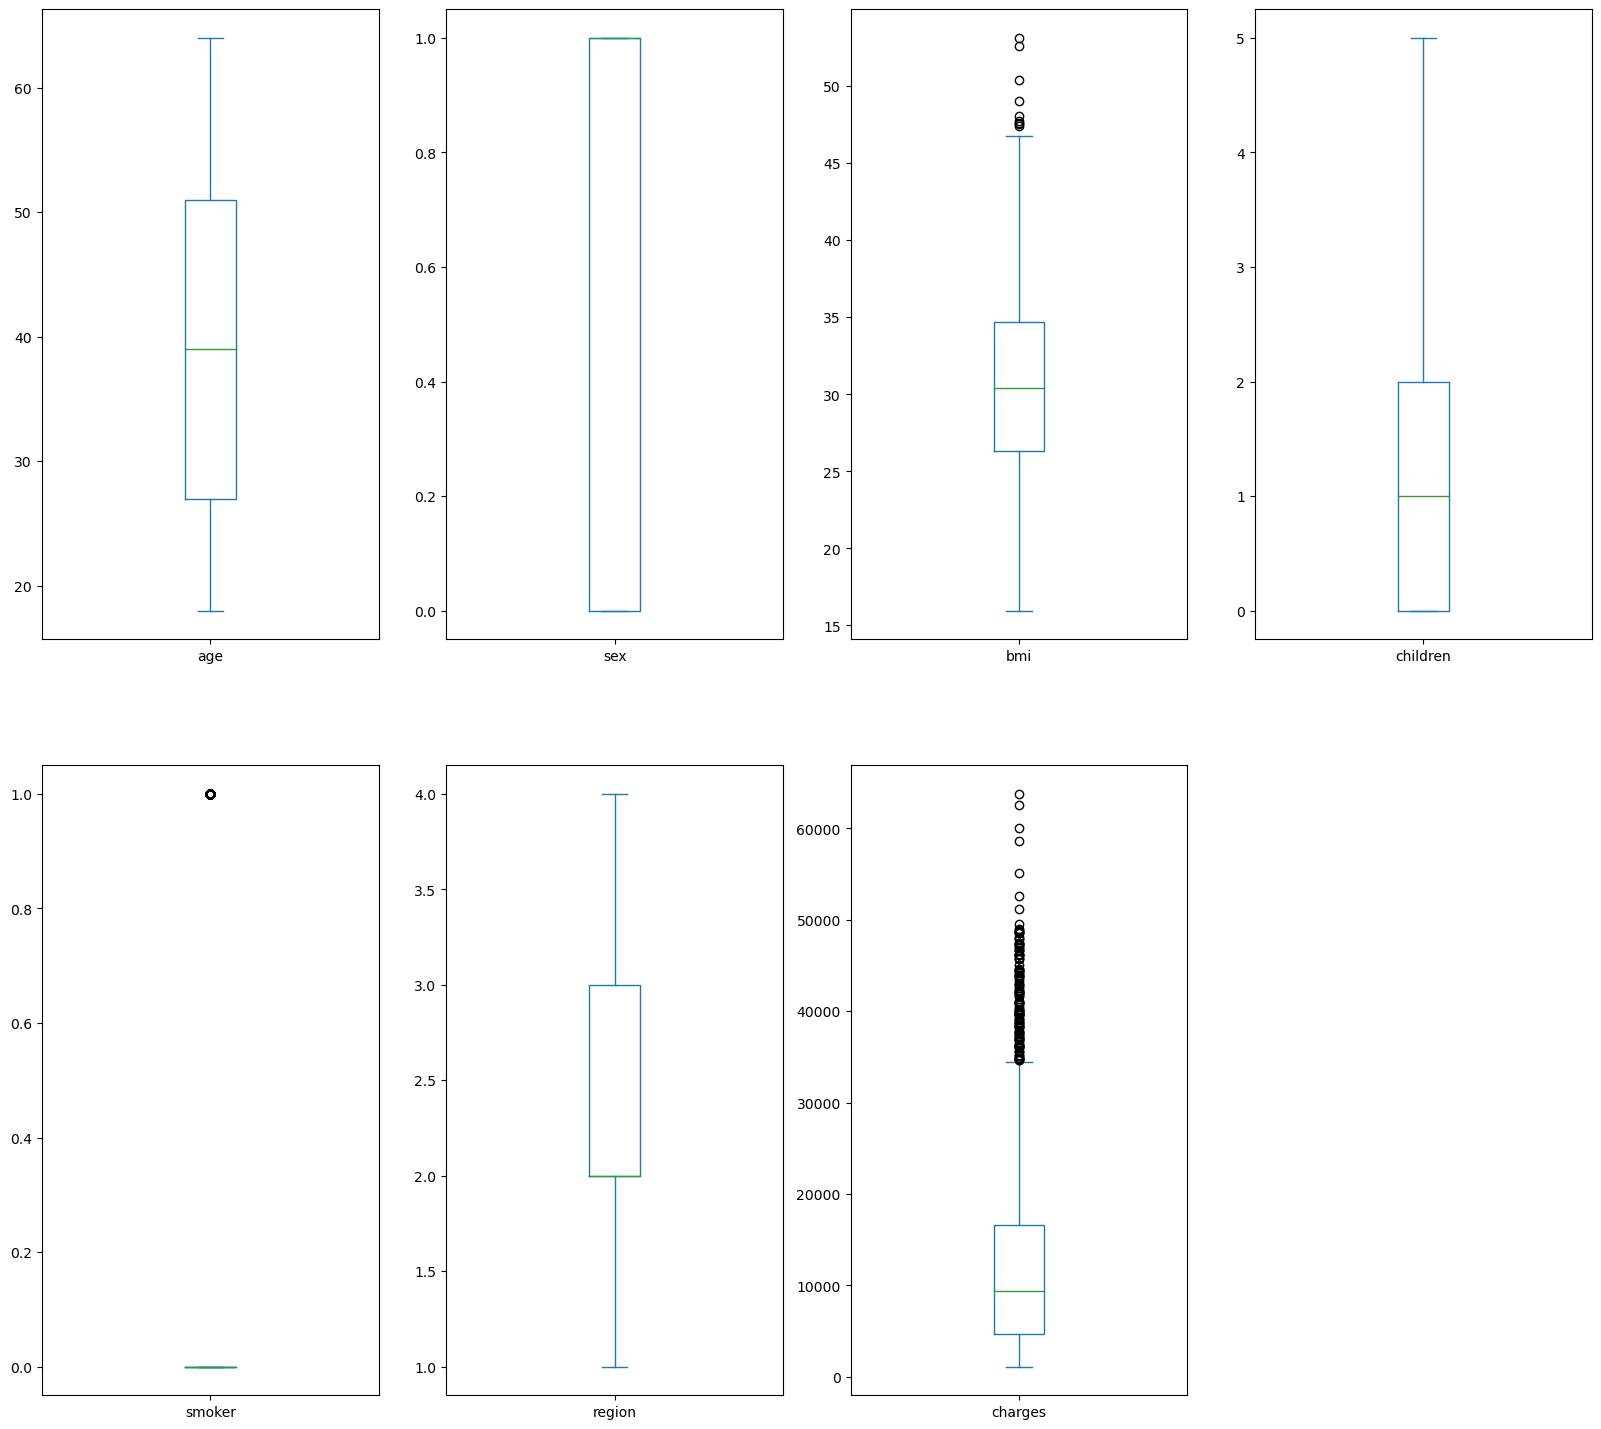

In [16]:
df.plot(kind="box", subplots=True, layout=(2,4), sharex=False, figsize=(20,18))
plt.show()

<Axes: title={'center': 'Trends of females = 0 and males = 1 in data'}, xlabel='sex'>

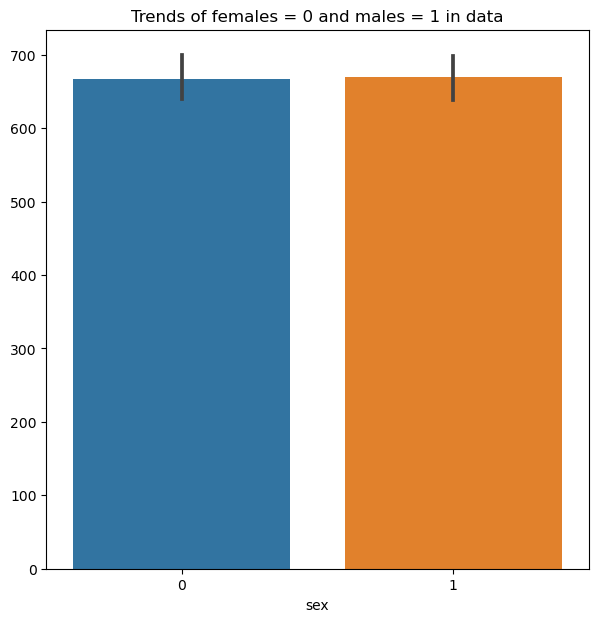

In [17]:
#To understand how many males and how many females are there

plt.figure(figsize=(7,7))

# Add title
plt.title("Trends of females = 0 and males = 1 in data")

sns.barplot(x=df['sex'], y=df.index)

###  Correlation Analysis and Feature Selection

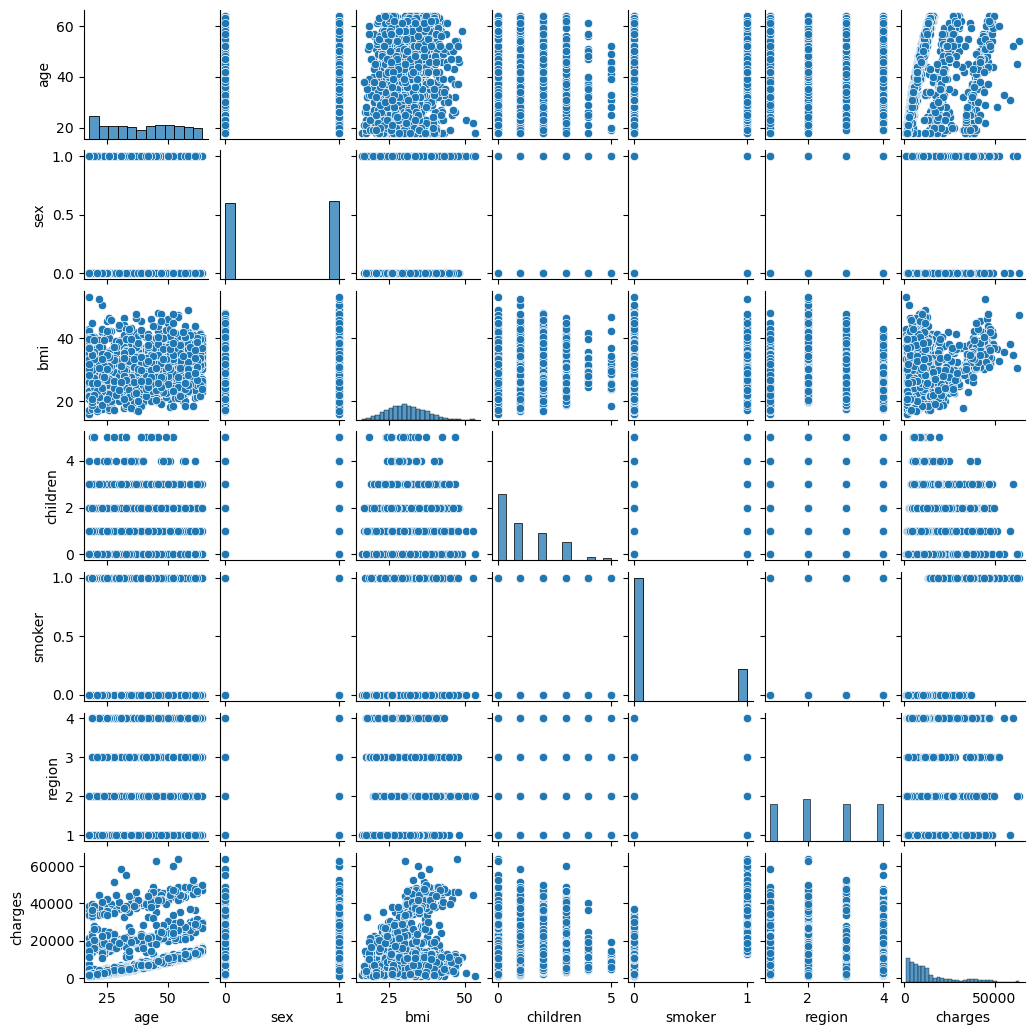

In [20]:
#Obtain pair plots of the data.  It is possible with Seaborn library.

sns.pairplot(df, height=1.5);
plt.show()

### Create a heatmap

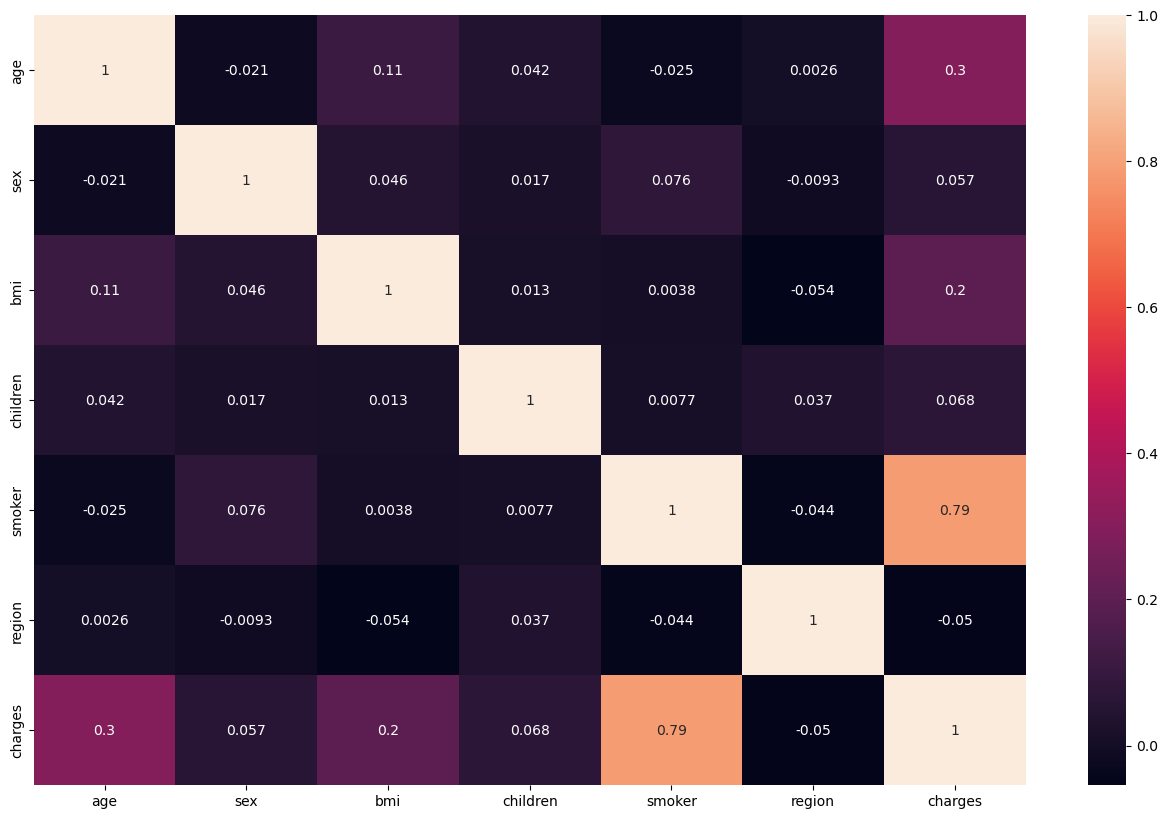

In [21]:
plt.figure(figsize =(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

### <span style = 'color: red'>Question 7:  </span>  What do the two visualization tell you about which two variables to use for your linear regression model?  Look at the variables that have a somewhat linear relationship and the highest correlation with your target variable (charges).  Add a code block below to answer question. Be sure that the new code block is run as markdown and not code.

Based on the two visualizatoins, age and smoker have a high or somewhat correlations, respectively.

### Separate the Dataset into Input & Output NumPy Arrays

In [22]:
#import train test split library
from sklearn.model_selection import train_test_split

In [23]:
df2 = df[['age', 'bmi', 'charges']]

### <span style = 'color: red'>Question 8:  </span>  In the code above, why are we creating a df2 variable?  Add a code block below to answer question. Be sure that the new code block is run as markdown and not code.

We are creating a different dateframe to separate the variables with at least a correlations to gain better insight into the data.

In [24]:
# Store the dataframe values into a numPy array
array = df2.values

# Separate the array into input and output components by slicing (you used this in your homework)
# For X (input) [:,2] --> All the rows and columns from 0 up to 2
X = array [:, 0:2]

# For Y (output) [:2] --> All the rows in the last column (MEDV)
Y = array [:,2]

### <span style = 'color: red'>Question 9:  </span>  In the code above, which variable are being used as the independent variables and which variable is being used as the dependent variable?  Add a code block below to answer question. Be sure that the new code block is run as markdown and not code.

In the code above, the row in the first three columns are the independent variables, while the all the rows in the last column are dependent variable.

### Spilt into Input/Output Array into Training/Testing Datasets

In [25]:
# Split the dataset --> training sub-dataset:  80%, and test sub-dataset:  20%

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

### Build and Train the Model

In [26]:
# Build the model
model=LinearRegression()

# Train the model using the training sub-dataset
model.fit(X_train, Y_train)


#Print out the coefficients and the intercept
# Print intercept and coefficients

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: -5803.004404976187
Coefficients: [221.26193476 338.77632197]


### <span style = 'color: red'>Question 10:  </span>  In the code above, what does the intercept and coefficients tell us?  Add a code block below to answer question. Be sure that the new code block is run as markdown and not code.

The intercept value occurs when the input/independent variable(s) equal zero. While a positive or negative coefficient tells us the relationship between the independent and depenedent variable(s), the values itself tells us at what value the predicted value is expected to change in the given direct - positive or negative.

In [27]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

LinearRegression(n_jobs=1)

### Calculate R-Squared

In [28]:
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.14085237637316694


### <span style = 'color: red'>Question 11:  </span>  In the code above, tell me what you think about the R-squared that was returned?  Add a code block below to answer question. Be sure that the new code block is run as markdown and not code.

Since the r-square is low, this model is not an accurate depiction of given variable as r-squared statistically represents how well this model fits the data.

### Prediction

In [29]:
# age = 72
# bmi = 50

model.predict([[72,50]])

array([27066.67099622])

### <span style = 'color: red'>Question 12:  </span>  From the output above, how does the prediction for a 72 year old person with a bmi of 50 compare with the mean of the variable "charges"?  Add a code block below to answer question. Be sure that the new code block is run as markdown and not code.

The predictions of the 72 year-old double the mean of the variable for "charges."

### <span style = 'color: red'>Question 13:  </span>  How do you think you could bring the charges down?  Make a new prediction by adding a code block below to answer this question. Be sure that the new code block is run as <span style = 'color: red'>code and not markdown. </span>    In order to make a new prediction, copy and paste the code into a new code block and change the values for the variables age and bmi.

In [31]:
#By lowering the BMI, the predicted charges will decrease.
# age = 72
# bmi = 50

model.predict([[72,25]])

array([18597.26294705])

### Evaluate/Validate Algorithm/Model, Using K-Fold Cross Validation

### <span style = 'color: red'>Question 14:  </span>  Choose one of the evaluation algorithms you used in the homework to evaluate the model (either 'neg_mean_squared_error' or 'explained_variance'. Add a code block below to answer this question. Be sure that the new code block is run as code and not markdown. 

In [32]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -129843866.77797166


In [33]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.11136139950673836
